In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

pd.set_option('display.max_columns', None)

%load_ext rpy2.ipython

In [2]:
%%R
library(edgeR)

Loading required package: limma


In [3]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random

In [4]:
from matplotlib import rcParams
from matplotlib import cm, colors

#Define a nice colour map for gene expression
colors2 = plt.cm.plasma(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap2 = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=300,transparent=True, fontsize=12) #color_map=mymap2)
sc.settings.figdir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/Human_scVI_single/DEG_analysis/figures'
sc.logging.print_header()

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


# Initial set up of anndata

In [6]:
adata= sc.read_h5ad('/scratch365/eaboelno/BACKUP_h5ad_IMPORTANT/scVI_mdata_OL_NEW.h5ad')
adata

AnnData object with n_obs × n_vars = 200872 × 27766
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 's_score', 'g2m_score', 'phase', 'cell_cycle_diff', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'pct_counts_ribo', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'Cycling cells', 'Cycling_cells', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DC

In [17]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['lesion_type'].unique()
for condition in unique_conditions:
    print(condition)

WM
CIL
RL
NAWM
AL
CAL


In [7]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['pmi_cat'].unique()
for condition in unique_conditions:
    print(condition)

over_12H
6H_to_12H
up_to_6H


In [8]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['pmi_cat2'].unique()
for condition in unique_conditions:
    print(condition)

over_12H
up_to_12H


In [9]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['age_cat'].unique()
for condition in unique_conditions:
    print(condition)

under_50
inbetween
over_70


In [10]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['seq_pool'].unique()
for condition in unique_conditions:
    print(condition)

Pool 6
Pool 5
Pool 3
Pool 1
Pool 4
Pool 2


In [11]:
adata.obs[:5]

,sample_id,publication,sample_id_anon,individual_id_anon,replicate,treatment,condition,tissue,time,batch,lesion_type,sample_source,diagnosis,n_genes_by_counts,total_counts,pct_counts_mt,s_score,g2m_score,phase,cell_cycle_diff,type_fine,type_broad,cluster_zoom,exclude_pseudobulk,seq_pool,sex,age_at_death,smoker,cause_of_death,years_w_ms,pmi_minutes,age_scale,age_cat,pmi_cat,pmi_cat2,pct_counts_ribo,cell_type_eval,library_type,sample_type,organism,system,n_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,total_counts_ribo,log1p_total_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,S_score,G2M_score,Cycling cells,Cycling_cells,Microglia,DAM,Macrophages,BAM,Monocytes,DCs,NKT cells,T cells,B cells,Neutrophils,Neurons,OPCs,COPs,MOL,Astrocytes,Pericytes,VSMCs,VLMCs,VECV,scVI_leiden_0.5,scVI_leiden_1,cluster_annotation,cell_leiden_annotated,scVI_leiden_OL_1,scVI_leiden_OL_1.5,OL_fine_type,OL_minimum,Pandey_DA_all_signature,OL_leiden_annotated,total_counts_mito,log1p_total_counts_mito,pct_counts_mito,OL_NEW_lettered,OL_NEW_letter_only,OL_fine_type_NEW,OL_fine_type_NEW_abbrev
Ind98-Sample2:AAACCCATCCGTCAAA-1,Human_MS,Macnair et al. biorxiv,Ind98-Sample2,Ind98,1,MS_patient,MS,White matter,34,31,WM,Edinburgh BB,CTR,1512,2704.927471,1.058036,-0.038595,-0.061295,G1,0.022699,Oligo_B,Oligodendrocytes,oligo_opc-cl01,False,Pool 6,M,34,unknown,"ischaemic heart disease, coronary artery ather...",-2147483648,5940,-1.759706,under_50,over_12H,over_12H,0.162289,oligodendrocytes,10X 3p kit v3.3,sn,human,1,3012.0,7.321850,7.903200,3.012636,28.619111,3.388420,4.389803,1.684509,2.033412,1.109688,0.075174,-0.009067,-0.090730,-0.103284,resting,-0.068000,-0.01,-0.036667,-0.015,0.0,-0.013363,0.0,-0.015,0.000,0.00,-0.094286,-0.02,-0.05,-0.14,-0.381526,-0.076667,-0.033333,-0.015,-0.040201,1,1,MOLs,1_MOLs,1,3,MOL3,MOL,-0.221944,3_MOL_C,28.619111,3.388420,1.058036,MOL_C,C,MOL_C,C
Ind98-Sample2:AAACGAAGTTGTACGT-1,Human_MS,Macnair et al. biorxiv,Ind98-Sample2,Ind98,1,MS_patient,MS,White matter,34,31,WM,Edinburgh BB,CTR,2448,3390.096319,0.330501,-0.081434,-0.049244,G1,-0.032190,Oligo_A,Oligodendrocytes,oligo_opc-cl07,False,Pool 6,M,34,unknown,"ischaemic heart disease, coronary artery ather...",-2147483648,5940,-1.759706,under_50,over_12H,over_12H,0.882552,oligodendrocytes,10X 3p kit v3.3,sn,human,1,5475.0,7.803435,8.128909,2.336087,11.204287,2.501787,29.919355,3.431382,3.117101,1.415149,0.091947,-0.057032,-0.109364,-0.124239,resting,-0.154000,-0.02,-0.073333,-0.025,0.0,-0.028953,0.0,-0.035,0.000,-0.02,-0.652000,-0.03,0.39,3.82,-0.154618,-0.100000,-0.066667,-0.025,-0.120603,4,7,MOLs,7_MOLs,3,4,MOL3,MOL,-0.287778,4_MOL_C,11.204287,2.501787,0.330501,MOL_C,C,MOL_C,C
Ind98-Sample2:AAACGCTCAGTTGGTT-1,Human_MS,Macnair et al. biorxiv,Ind98-Sample2,Ind98,1,MS_patient,MS,White matter,34,31,WM,Edinburgh BB,CTR,420,1295.180167,2.225623,0.034034,0.037705,S,-0.003671,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,Pool 6,M,34,unknown,"ischaemic heart disease, coronary artery ather...",-2147483648,5940,-1.759706,under_50,over_12H,over_12H,0.679484,oligodendrocytes,10X 3p kit v3.3,sn,human,1,562.0,6.042633,7.167177,6.881731,28.825822,3.395375,8.800548,2.282438,0.000000,0.000000,0.000000,0.017996,0.003707,0.007449,cycling,0.059333,0.00,-0.003333,0.000,0.0,-0.011136,0.0,0.000,0.000,0.00,-0.116000,0.00,0.00,0.00,-0.116466,-0.003333,-0.006667,0.000,-0.010050,0,2,MOLs,2_MOLs,4,17,MOL2,MOL,0.048611,17_MOL_B,28.825822,3.395375,2.225623,MOL_B,B,MOL_B,B
Ind98-Sample2:AAAGGGCAGAAGGATG-1,Human_MS,Macnair et al. biorxiv,Ind98-Sample2,Ind98,1,MS_patient,MS,White matter,34,31,WM,Edinburgh BB,CTR,3252,3739.989990,0.388110,-0.062468,-0.057154,S,-0.005314,Oligo_C,Oligodendrocytes,oligo_opc-cl02,False,Pool 6,M,34,unknown,"ischaemic heart disease, coronary artery ather...",-2147483648,5940,-1.759706,under_50,over_12H,over_12H,0.606896,oligodendrocytes,10X 3p kit v3.3,sn,human,1,8617.0,8.087333,8.227106,2.091840,14.515276

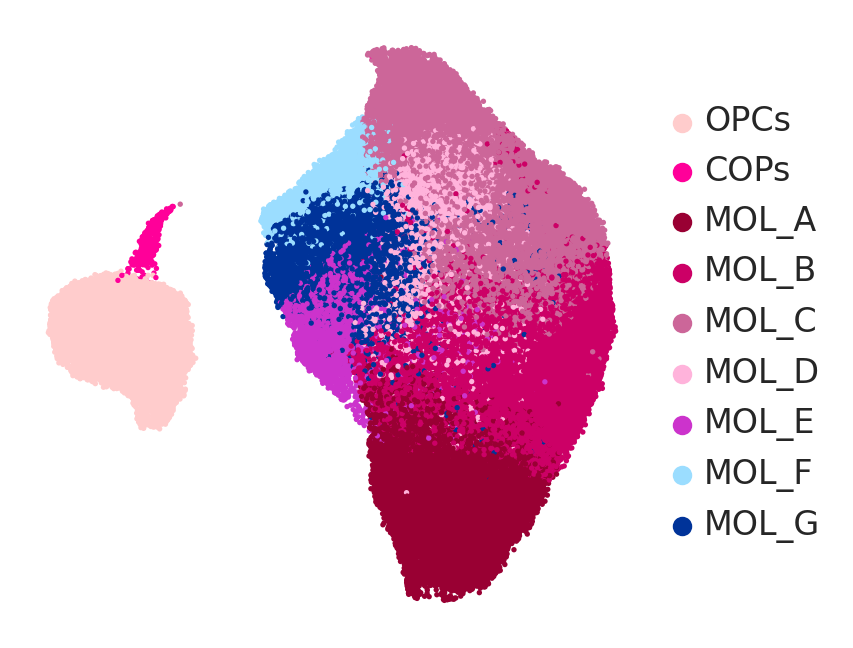

In [12]:
cluster_color = {
    'MOL_A': '#990033',
    'MOL_B': '#cc0066',
    'MOL_C': '#cc6699',
    'MOL_F': '#9bddff',
    'MOL_G': '#003399',
    'MOL_D': '#ffb3db',
    'MOL_E': '#cc33cc',
    'OPCs': '#ffcccc',
    'COPs': '#ff0099',
}

#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata, color=['OL_fine_type_NEW'], legend_fontsize =float(12) , wspace=0.6, 
           cmap=mymap2,palette=cluster_color,s=15,
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1)

In [13]:
cell_counts = adata.obs['OL_fine_type_NEW'].value_counts()

# Display the counts
print(cell_counts)

OL_fine_type_NEW
MOL_B    52957
MOL_C    45939
MOL_A    31271
MOL_D    25926
MOL_G    22553
OPCs     12178
MOL_E     6600
MOL_F     3047
COPs       401
Name: count, dtype: int64


In [14]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['OL_fine_type_NEW'].unique()
for condition in unique_conditions:
    print(condition)

MOL_C
MOL_B
MOL_D
MOL_A
OPCs
MOL_G
COPs
MOL_E
MOL_F


In [15]:
sc.tl.dendrogram(adata, groupby='OL_fine_type_NEW')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_OL_fine_type_NEW']`


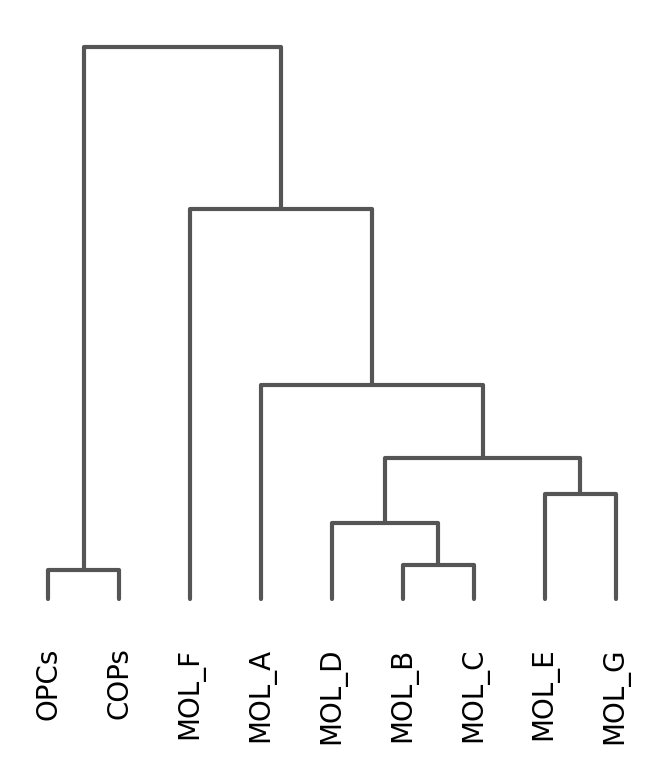

<Axes: >

In [16]:
sc.pl.dendrogram(adata, groupby='OL_fine_type_NEW')

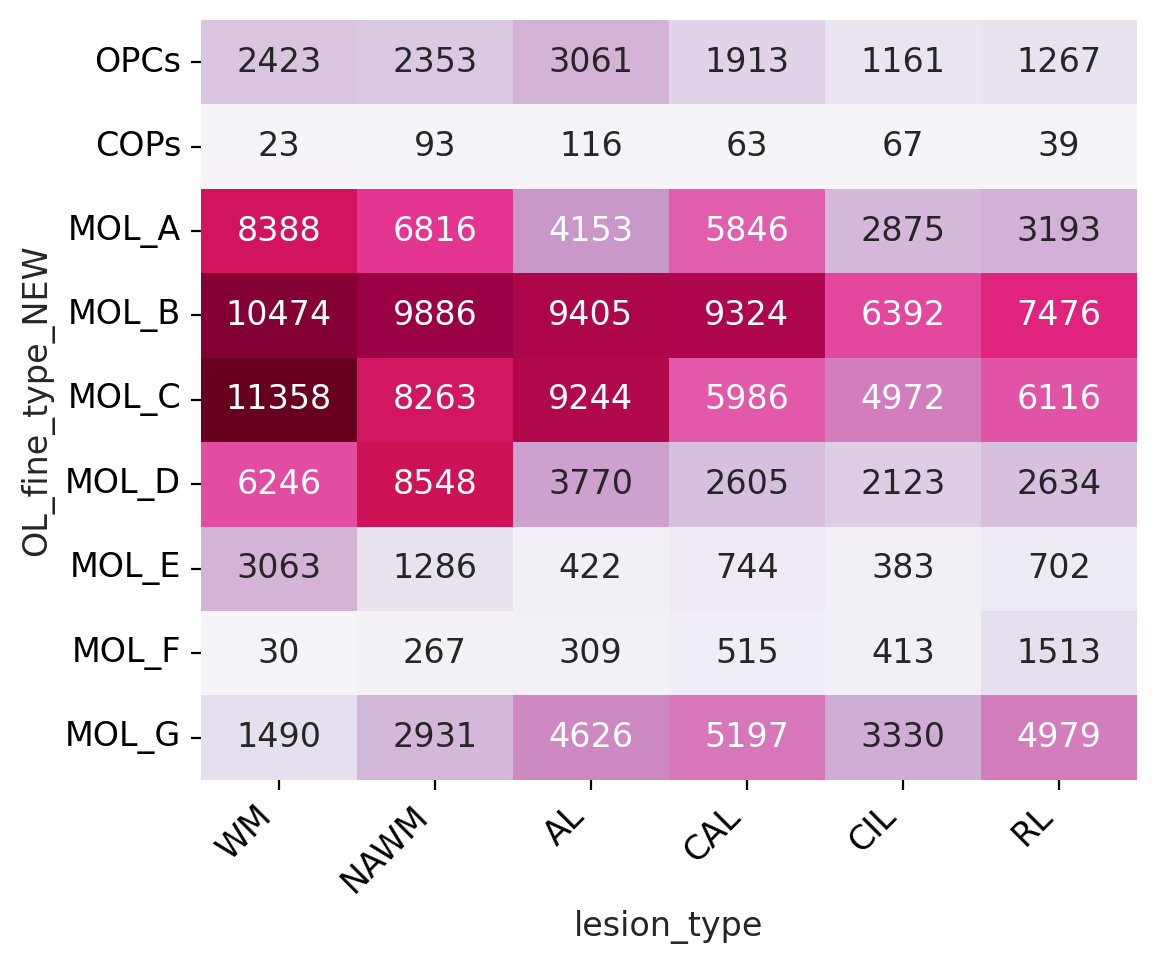

In [19]:
import seaborn as sb

# Define the desired order for the x-axis (lesion_status)
desired_order = ['WM', 'NAWM', 'AL', 'CAL', 'CIL', 'RL']

# Reorder the lesion_status column in adata_sub.obs
adata.obs['lesion_type'] = pd.Categorical(
    adata.obs['lesion_type'], categories=desired_order, ordered=True
)

plt.figure(figsize=(6, 5))
crosstab_df = pd.crosstab(adata.obs.OL_fine_type_NEW, adata.obs.lesion_type)

ax = sb.heatmap(crosstab_df, cmap='PuRd', annot=True, fmt="d", cbar=False, annot_kws={"size": 12})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.grid(False)

# Save the heatmap as a PNG file
output_path = "./figures/PB_heatmap_allcell_lesions.png"  # Change the path and filename if needed
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

# Show the heatmap
plt.show()

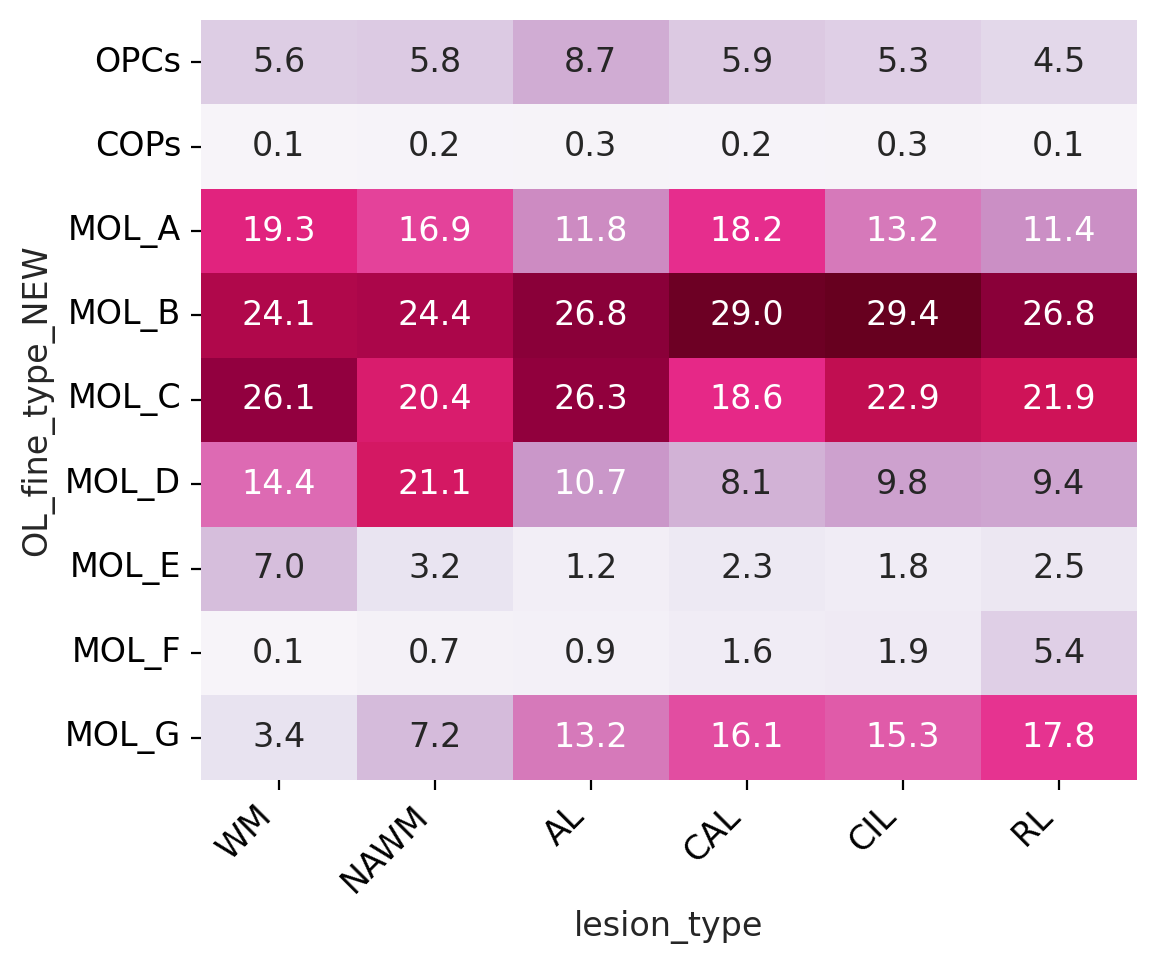

In [20]:
# Define the desired order for the x-axis (lesion_status)
desired_order = ['WM', 'NAWM', 'AL', 'CAL', 'CIL', 'RL']

# Reorder the lesion_status column in adata.obs
adata.obs['lesion_type'] = pd.Categorical(
    adata.obs['lesion_type'], categories=desired_order, ordered=True
)

# Calculate the crosstab as before
crosstab_df = pd.crosstab(adata.obs.OL_fine_type_NEW, adata.obs.lesion_type)

# Convert the counts to percentages
crosstab_percentage = crosstab_df.div(crosstab_df.sum(axis=0), axis=1) * 100

# Plot the percentage-based heatmap
plt.figure(figsize=(6, 5))
ax = sb.heatmap(
    crosstab_percentage, 
    cmap='PuRd', 
    annot=True, 
    fmt=".1f",  # Display percentages with 1 decimal place
    cbar=False, 
    annot_kws={"size": 12}
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.grid(False)

# Save the heatmap as a PNG file
output_path = "./figures/PB_heatmap_percentage_lesions.png"  # Change the path and filename if needed
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

# Show the heatmap
plt.show()

In [ ]:
sample_map = {
    'MOL_A': 'MOL_ctrl',
    'MOL_B': 'MOL_ctrl',
    'MOL_C': 'MOL_ctrl',
    'MOL_F': 'MOL_trt',
    'MOL_G': 'MOL_trt',
    'MOL_D': 'MOL_ctrl',
    'MOL_E': 'MOL_E',
    'OPCs': 'OPCs',
    'COPs': 'COPs',
}

# Update the 'treatment_meta' column based on the mapping
#adata.obs['cell_type'] = adata.obs['OL_fine_type_NEW'].map(sample_map)

In [21]:
adata.obs['cell_type'] = adata.obs['OL_fine_type_NEW']

In [ ]:
# Define the order of cell types
cell_type_order = ['OPCs', 'COPs', 'MOL_ctrl', 'MOL_trt', 'MOL_E']

# Reorder the cell types
adata.obs['cell_type'] = pd.Categorical(adata.obs['cell_type'], 
                                                     categories=cell_type_order, ordered=True)

In [ ]:
cluster_color = {
    'MOL_ctrl': '#cc0066',
    'MOL_trt': '#003399',
    'MOL_E': '#cc33cc',
    'OPCs': '#ffcccc',
    'COPs': '#ff0099'
}

#Visualize the clustering and how this is reflected by different technical covariate
sc.pl.umap(adata, color=['cell_type'], legend_fontsize =float(10) , wspace=0.6, 
           cmap=mymap2,palette=cluster_color,s=20,
           legend_fontweight= 'bold', title='', frameon= False , 
           legend_fontoutline=1, save='_MOL_deg_nomenclature.png')

In [22]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['cell_type'].unique()
for condition in unique_conditions:
    print(condition)

MOL_C
MOL_B
MOL_D
MOL_A
OPCs
MOL_G
COPs
MOL_E
MOL_F


In [23]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['lesion_type'].unique()
for condition in unique_conditions:
    print(condition)

WM
CIL
RL
NAWM
AL
CAL


In [ ]:
cluster_color = {
    'MOL_ctrl': '#cc0066',
    'MOL_trt': '#003399',
    'MOL_E': '#cc33cc',
    'OPCs': '#ffcccc',
    'COPs': '#ff0099'
}

# Set a grey color for cells not in the current lesion_status
grey_color = '#d3d3d3'

# Iterate over unique lesion_statuses
for lesion_status in adata.obs['lesion_type'].unique():
    # Create a mask for cells in the specific lesion_status
    lesion_mask = adata.obs['lesion_type'] == lesion_status

    # Initialize color vector for cells not in the lesion_status
    colors = np.array([grey_color] * adata.shape[0])  # Initialize all to grey

    # Plot UMAP with grey dots first
    plt.figure(figsize=(5, 5))  # Ensure figure size matches settings
    umap_coords = adata.obsm['X_umap']
    grey_mask = ~lesion_mask
    plt.scatter(umap_coords[grey_mask, 0], umap_coords[grey_mask, 1], 
                color=grey_color, s=10, edgecolor='none')

    # Overlay cell type colors on top
    for cell_type in cluster_color:
        # Assign the specific cluster color for cells of the current type in the lesion_status
        cell_type_mask = (adata.obs['cell_type'] == cell_type) & lesion_mask
        plt.scatter(umap_coords[cell_type_mask, 0], umap_coords[cell_type_mask, 1], 
                    color=cluster_color[cell_type], s=10, edgecolor='none')

    # Customize plot appearance
    plt.title(f"{lesion_status}", fontsize=12)  # Ensure title is added with fontsize
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    
    # Remove grid and axes
    plt.grid(False)
    plt.gca().set_axis_off()

    # Save the plot with specified parameters
    plt.tight_layout()
    plt.savefig(f"{sc.settings.figdir}/{lesion_status}_combined_umap.png", dpi=300, transparent=True)

    # Show the plot in the console
    plt.show()

    # Close the plot
    plt.close()

In [ ]:
adata.obs[:5]

In [ ]:
# Group and count cells per sample_id_anon and cell_type
count_table = adata.obs.groupby(['sample_id_anon', 'cell_type']).size().reset_index(name='Cell_Count')

# Pivot the table to have sample_id_anon as rows, cell_type as columns, and counts as values
pivot_table = count_table.pivot(index='sample_id_anon', columns='cell_type', values='Cell_Count').fillna(0)

# Optional: Convert float values to integers (since these are counts)
pivot_table = pivot_table.astype(int)
pivot_table

In [ ]:
import seaborn as sb

# Define the desired order for the x-axis (lesion_status)
desired_order = ['WM', 'NAWM', 'AL', 'CAL', 'CIL', 'RL']

# Reorder the lesion_status column in adata_sub.obs
adata.obs['lesion_type'] = pd.Categorical(
    adata.obs['lesion_type'], categories=desired_order, ordered=True
)

# Create the crosstab again
crosstab_df = pd.crosstab(adata.obs.cell_type, adata.obs.lesion_type)

# Plot the heatmap
plt.figure(figsize=(6, 5))
ax = sb.heatmap(crosstab_df, cmap='PuRd', annot=True, fmt="d", cbar=False, annot_kws={"size": 12})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.grid(False)

# Save the heatmap as a PNG file
output_path = "./figures/PB_heatmap_ordered.png"  # Change the path and filename if needed
plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

# Show the heatmap
plt.show()

# Set up columns for PB

In [24]:
# Concatenate 'individual_lesion_condition' and 'replicate' to create 'sample'
adata.obs['sample_lesion'] = adata.obs['sample_id_anon'].astype(str) + '_' + adata.obs['lesion_type'].astype(str)

In [25]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['sample_lesion'].unique()
for condition in unique_conditions:
    print(condition)

Ind98-Sample2_WM
Ind101-Sample1_CIL
Ind101-Sample2_CIL
Ind101-Sample3_RL
Ind101-Sample4_NAWM
Ind102-Sample1_AL
Ind103-Sample1_AL
Ind102-Sample2_CAL
Ind86-Sample2_WM
Ind104-Sample1_RL
Ind105-Sample1_NAWM
Ind106-Sample1_AL
Ind106-Sample2_NAWM
Ind107-Sample1_WM
Ind108-Sample1_CIL
Ind108-Sample2_CIL
Ind108-Sample3_RL
Ind108-Sample4_RL
Ind108-Sample5_NAWM
Ind109-Sample1_AL
Ind110-Sample1_CAL
Ind111-Sample1_NAWM
Ind112-Sample1_AL
Ind113-Sample1_AL
Ind114-Sample1_AL
Ind115-Sample1_AL
Ind116-Sample1_CAL
Ind117-Sample1_WM
Ind108-Sample6_CIL
Ind118-Sample1_AL
Ind118-Sample2_AL
Ind119-Sample1_CAL
Ind120-Sample1_CAL
Ind118-Sample3_NAWM
Ind120-Sample2_NAWM
Ind121-Sample1_WM
Ind122-Sample1_AL
Ind114-Sample2_AL
Ind123-Sample1_CAL
Ind124-Sample1_CAL
Ind125-Sample1_NAWM
Ind122-Sample2_NAWM
Ind126-Sample1_WM
Ind127-Sample1_AL
Ind116-Sample2_CAL
Ind127-Sample2_CAL
Ind128-Sample1_CIL
Ind102-Sample3_CIL
Ind116-Sample3_NAWM
Ind112-Sample2_NAWM
Ind130-Sample1_AL
Ind130-Sample2_AL
Ind130-Sample3_CAL
Ind114-Sa

In [56]:
# List of samples
samples = [
    'Ind98-Sample2_WM', 'Ind101-Sample1_CIL', 'Ind101-Sample2_CIL', 'Ind101-Sample3_RL',
    'Ind101-Sample4_NAWM', 'Ind102-Sample1_AL', 'Ind103-Sample1_AL', 'Ind102-Sample2_CAL',
    'Ind86-Sample2_WM', 'Ind104-Sample1_RL', 'Ind105-Sample1_NAWM', 'Ind106-Sample1_AL',
    'Ind106-Sample2_NAWM', 'Ind107-Sample1_WM', 'Ind108-Sample1_CIL', 'Ind108-Sample2_CIL',
    'Ind108-Sample3_RL', 'Ind108-Sample4_RL', 'Ind108-Sample5_NAWM', 'Ind109-Sample1_AL',
    'Ind110-Sample1_CAL', 'Ind111-Sample1_NAWM', 'Ind112-Sample1_AL', 'Ind113-Sample1_AL',
    'Ind114-Sample1_AL', 'Ind115-Sample1_AL', 'Ind116-Sample1_CAL', 'Ind117-Sample1_WM',
    'Ind108-Sample6_CIL', 'Ind118-Sample1_AL', 'Ind118-Sample2_AL', 'Ind119-Sample1_CAL',
    'Ind120-Sample1_CAL', 'Ind118-Sample3_NAWM', 'Ind120-Sample2_NAWM', 'Ind121-Sample1_WM',
    'Ind122-Sample1_AL', 'Ind114-Sample2_AL', 'Ind123-Sample1_CAL', 'Ind124-Sample1_CAL',
    'Ind125-Sample1_NAWM', 'Ind122-Sample2_NAWM', 'Ind126-Sample1_WM', 'Ind127-Sample1_AL',
    'Ind116-Sample2_CAL', 'Ind127-Sample2_CAL', 'Ind128-Sample1_CIL', 'Ind102-Sample3_CIL',
    'Ind116-Sample3_NAWM', 'Ind112-Sample2_NAWM', 'Ind130-Sample1_AL', 'Ind130-Sample2_AL',
    'Ind130-Sample3_CAL', 'Ind114-Sample3_CAL', 'Ind123-Sample2_CIL', 'Ind123-Sample3_CIL',
    'Ind130-Sample4_NAWM', 'Ind131-Sample1_WM', 'Ind132-Sample1_AL', 'Ind127-Sample3_AL',
    'Ind127-Sample4_AL', 'Ind130-Sample5_CAL', 'Ind104-Sample2_CIL', 'Ind104-Sample3_NAWM',
    'Ind133-Sample1_WM', 'Ind134-Sample1_CIL', 'Ind134-Sample2_CIL', 'Ind134-Sample3_RL',
    'Ind134-Sample4_NAWM', 'Ind113-Sample2_AL', 'Ind118-Sample4_CAL', 'Ind113-Sample3_NAWM',
    'Ind135-Sample1_WM', 'Ind136-Sample1_CAL', 'Ind137-Sample1_CAL', 'Ind109-Sample2_CIL',
    'Ind109-Sample3_NAWM', 'Ind132-Sample2_NAWM', 'Ind139-Sample1_WM', 'Ind140-Sample1_WM',
    'Ind141-Sample1_RL', 'Ind142-Sample1_RL', 'Ind141-Sample2_RL', 'Ind127-Sample5_CAL',
    'Ind143-Sample1_AL', 'Ind144-Sample1_WM', 'Ind145-Sample1_WM', 'Ind142-Sample2_RL',
    'Ind146-Sample1_RL', 'Ind147-Sample1_RL', 'Ind115-Sample2_AL', 'Ind102-Sample4_CAL'
]

# Initialize counters
wm_counter, nawm_counter, al_counter, cal_counter, cil_counter, rl_counter = 1, 1, 1, 1, 1, 1

# Initialize dictionary
sample_dict = {}

# Iterate through the list of samples and map based on conditions
for sample in samples:
    if "NAWM" in sample:  # Check for NAWM first
        sample_dict[sample] = f"NAWM_{nawm_counter}"
        nawm_counter += 1
    elif "WM" in sample:  # Check for WM
        sample_dict[sample] = f"WM_{wm_counter}"
        wm_counter += 1
    elif "AL" in sample and "CAL" not in sample:  # Check specifically for AL (but not CAL)
        sample_dict[sample] = f"AL_{al_counter}"
        print(f"{sample} = AL_{al_counter}")
        al_counter += 1
    elif "CAL" in sample:  # Check for CAL
        sample_dict[sample] = f"CAL_{cal_counter}"
        print(f"{sample} = CAL_{cal_counter}")
        cal_counter += 1
    elif "CIL" in sample:  # Check for CIL
        sample_dict[sample] = f"CIL_{cil_counter}"
        print(f"{sample} = CIL_{cil_counter}")
        cil_counter += 1
    elif "RL" in sample:  # Check for RL
        sample_dict[sample] = f"RL_{rl_counter}"
        print(f"{sample} = RL_{rl_counter}")
        rl_counter += 1

# Print the resulting dictionary
from pprint import pprint
pprint(sample_dict)

Ind101-Sample1_CIL = CIL_1
Ind101-Sample2_CIL = CIL_2
Ind101-Sample3_RL = RL_1
Ind102-Sample1_AL = AL_1
Ind103-Sample1_AL = AL_2
Ind102-Sample2_CAL = CAL_1
Ind104-Sample1_RL = RL_2
Ind106-Sample1_AL = AL_3
Ind108-Sample1_CIL = CIL_3
Ind108-Sample2_CIL = CIL_4
Ind108-Sample3_RL = RL_3
Ind108-Sample4_RL = RL_4
Ind109-Sample1_AL = AL_4
Ind110-Sample1_CAL = CAL_2
Ind112-Sample1_AL = AL_5
Ind113-Sample1_AL = AL_6
Ind114-Sample1_AL = AL_7
Ind115-Sample1_AL = AL_8
Ind116-Sample1_CAL = CAL_3
Ind108-Sample6_CIL = CIL_5
Ind118-Sample1_AL = AL_9
Ind118-Sample2_AL = AL_10
Ind119-Sample1_CAL = CAL_4
Ind120-Sample1_CAL = CAL_5
Ind122-Sample1_AL = AL_11
Ind114-Sample2_AL = AL_12
Ind123-Sample1_CAL = CAL_6
Ind124-Sample1_CAL = CAL_7
Ind127-Sample1_AL = AL_13
Ind116-Sample2_CAL = CAL_8
Ind127-Sample2_CAL = CAL_9
Ind128-Sample1_CIL = CIL_6
Ind102-Sample3_CIL = CIL_7
Ind130-Sample1_AL = AL_14
Ind130-Sample2_AL = AL_15
Ind130-Sample3_CAL = CAL_10
Ind114-Sample3_CAL = CAL_11
Ind123-Sample2_CIL = CIL_8
Ind1

In [57]:
sample_dict = {'Ind101-Sample1_CIL': 'CIL_1',
 'Ind101-Sample2_CIL': 'CIL_2',
 'Ind101-Sample3_RL': 'RL_1',
 'Ind101-Sample4_NAWM': 'NAWM_1',
 'Ind102-Sample1_AL': 'AL_1',
 'Ind102-Sample2_CAL': 'CAL_1',
 'Ind102-Sample3_CIL': 'CIL_7',
 'Ind102-Sample4_CAL': 'CAL_17',
 'Ind103-Sample1_AL': 'AL_2',
 'Ind104-Sample1_RL': 'RL_2',
 'Ind104-Sample2_CIL': 'CIL_10',
 'Ind104-Sample3_NAWM': 'NAWM_13',
 'Ind105-Sample1_NAWM': 'NAWM_2',
 'Ind106-Sample1_AL': 'AL_3',
 'Ind106-Sample2_NAWM': 'NAWM_3',
 'Ind107-Sample1_WM': 'WM_3',
 'Ind108-Sample1_CIL': 'CIL_3',
 'Ind108-Sample2_CIL': 'CIL_4',
 'Ind108-Sample3_RL': 'RL_3',
 'Ind108-Sample4_RL': 'RL_4',
 'Ind108-Sample5_NAWM': 'NAWM_4',
 'Ind108-Sample6_CIL': 'CIL_5',
 'Ind109-Sample1_AL': 'AL_4',
 'Ind109-Sample2_CIL': 'CIL_13',
 'Ind109-Sample3_NAWM': 'NAWM_16',
 'Ind110-Sample1_CAL': 'CAL_2',
 'Ind111-Sample1_NAWM': 'NAWM_5',
 'Ind112-Sample1_AL': 'AL_5',
 'Ind112-Sample2_NAWM': 'NAWM_11',
 'Ind113-Sample1_AL': 'AL_6',
 'Ind113-Sample2_AL': 'AL_19',
 'Ind113-Sample3_NAWM': 'NAWM_15',
 'Ind114-Sample1_AL': 'AL_7',
 'Ind114-Sample2_AL': 'AL_12',
 'Ind114-Sample3_CAL': 'CAL_11',
 'Ind115-Sample1_AL': 'AL_8',
 'Ind115-Sample2_AL': 'AL_21',
 'Ind116-Sample1_CAL': 'CAL_3',
 'Ind116-Sample2_CAL': 'CAL_8',
 'Ind116-Sample3_NAWM': 'NAWM_10',
 'Ind117-Sample1_WM': 'WM_4',
 'Ind118-Sample1_AL': 'AL_9',
 'Ind118-Sample2_AL': 'AL_10',
 'Ind118-Sample3_NAWM': 'NAWM_6',
 'Ind118-Sample4_CAL': 'CAL_13',
 'Ind119-Sample1_CAL': 'CAL_4',
 'Ind120-Sample1_CAL': 'CAL_5',
 'Ind120-Sample2_NAWM': 'NAWM_7',
 'Ind121-Sample1_WM': 'WM_5',
 'Ind122-Sample1_AL': 'AL_11',
 'Ind122-Sample2_NAWM': 'NAWM_9',
 'Ind123-Sample1_CAL': 'CAL_6',
 'Ind123-Sample2_CIL': 'CIL_8',
 'Ind123-Sample3_CIL': 'CIL_9',
 'Ind124-Sample1_CAL': 'CAL_7',
 'Ind125-Sample1_NAWM': 'NAWM_8',
 'Ind126-Sample1_WM': 'WM_6',
 'Ind127-Sample1_AL': 'AL_13',
 'Ind127-Sample2_CAL': 'CAL_9',
 'Ind127-Sample3_AL': 'AL_17',
 'Ind127-Sample4_AL': 'AL_18',
 'Ind127-Sample5_CAL': 'CAL_16',
 'Ind128-Sample1_CIL': 'CIL_6',
 'Ind130-Sample1_AL': 'AL_14',
 'Ind130-Sample2_AL': 'AL_15',
 'Ind130-Sample3_CAL': 'CAL_10',
 'Ind130-Sample4_NAWM': 'NAWM_12',
 'Ind130-Sample5_CAL': 'CAL_12',
 'Ind131-Sample1_WM': 'WM_7',
 'Ind132-Sample1_AL': 'AL_16',
 'Ind132-Sample2_NAWM': 'NAWM_17',
 'Ind133-Sample1_WM': 'WM_8',
 'Ind134-Sample1_CIL': 'CIL_11',
 'Ind134-Sample2_CIL': 'CIL_12',
 'Ind134-Sample3_RL': 'RL_5',
 'Ind134-Sample4_NAWM': 'NAWM_14',
 'Ind135-Sample1_WM': 'WM_9',
 'Ind136-Sample1_CAL': 'CAL_14',
 'Ind137-Sample1_CAL': 'CAL_15',
 'Ind139-Sample1_WM': 'WM_10',
 'Ind140-Sample1_WM': 'WM_11',
 'Ind141-Sample1_RL': 'RL_6',
 'Ind141-Sample2_RL': 'RL_8',
 'Ind142-Sample1_RL': 'RL_7',
 'Ind142-Sample2_RL': 'RL_9',
 'Ind143-Sample1_AL': 'AL_20',
 'Ind144-Sample1_WM': 'WM_12',
 'Ind145-Sample1_WM': 'WM_13',
 'Ind146-Sample1_RL': 'RL_10',
 'Ind147-Sample1_RL': 'RL_11',
 'Ind86-Sample2_WM': 'WM_2',
 'Ind98-Sample2_WM': 'WM_1'}


# Update the 'treatment_meta' column based on the mapping
adata.obs['sample_rep'] = adata.obs['sample_lesion'].map(sample_dict)

In [58]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['sample_rep'].unique()
for condition in unique_conditions:
    print(condition)

WM_1
CIL_1
CIL_2
RL_1
NAWM_1
AL_1
AL_2
CAL_1
WM_2
RL_2
NAWM_2
AL_3
NAWM_3
WM_3
CIL_3
CIL_4
RL_3
RL_4
NAWM_4
AL_4
CAL_2
NAWM_5
AL_5
AL_6
AL_7
AL_8
CAL_3
WM_4
CIL_5
AL_9
AL_10
CAL_4
CAL_5
NAWM_6
NAWM_7
WM_5
AL_11
AL_12
CAL_6
CAL_7
NAWM_8
NAWM_9
WM_6
AL_13
CAL_8
CAL_9
CIL_6
CIL_7
NAWM_10
NAWM_11
AL_14
AL_15
CAL_10
CAL_11
CIL_8
CIL_9
NAWM_12
WM_7
AL_16
AL_17
AL_18
CAL_12
CIL_10
NAWM_13
WM_8
CIL_11
CIL_12
RL_5
NAWM_14
AL_19
CAL_13
NAWM_15
WM_9
CAL_14
CAL_15
CIL_13
NAWM_16
NAWM_17
WM_10
WM_11
RL_6
RL_7
RL_8
CAL_16
AL_20
WM_12
WM_13
RL_9
RL_10
RL_11
AL_21
CAL_17


In [59]:
# List of values
values = [
    'WM_1', 'CIL_1', 'CIL_2', 'RL_1', 'NAWM_1', 'AL_1', 'AL_2', 'CAL_1', 'WM_2', 'RL_2', 'NAWM_2', 'AL_3', 
    'NAWM_3', 'WM_3', 'CIL_3', 'CIL_4', 'RL_3', 'RL_4', 'NAWM_4', 'AL_4', 'CAL_2', 'NAWM_5', 'AL_5', 'AL_6', 
    'AL_7', 'AL_8', 'CAL_3', 'WM_4', 'CIL_5', 'AL_9', 'AL_10', 'CAL_4', 'CAL_5', 'NAWM_6', 'NAWM_7', 'WM_5', 
    'AL_11', 'AL_12', 'CAL_6', 'CAL_7', 'NAWM_8', 'NAWM_9', 'WM_6', 'AL_13', 'CAL_8', 'CAL_9', 'CIL_6', 
    'CIL_7',
    'NAWM_10',
    'NAWM_11',
    'AL_14',
    'AL_15',
    'CAL_10',
    'CAL_11',
    'CIL_8',
    'CIL_9',
    'NAWM_12',
    'WM_7',
    'AL_16',
    'AL_17',
    'AL_18',
    'CAL_12',
    'CIL_10',
    'NAWM_13',
    'WM_8',
    'CIL_11',
    'CIL_12',
    'RL_5',
    'NAWM_14',
    'AL_19',
    'CAL_13',
    'NAWM_15',
    'WM_9',
    'CAL_14',
    'CAL_15',
    'CIL_13',
    'NAWM_16',
    'NAWM_17',
    'WM_10',
    'WM_11',
    'RL_6',
    'RL_7',
    'RL_8',
    'CAL_16',
    'AL_20',
    'WM_12',
    'WM_13',
    'RL_9',
    'RL_10',
    'RL_11',
    'AL_21',
    'CAL_17'
]

# Extract replicate numbers into a dictionary
replicate_dict = {value: int(value.split('_')[-1]) for value in values}

# Display the dictionary
from pprint import pprint
pprint(replicate_dict)

{'AL_1': 1,
 'AL_10': 10,
 'AL_11': 11,
 'AL_12': 12,
 'AL_13': 13,
 'AL_14': 14,
 'AL_15': 15,
 'AL_16': 16,
 'AL_17': 17,
 'AL_18': 18,
 'AL_19': 19,
 'AL_2': 2,
 'AL_20': 20,
 'AL_21': 21,
 'AL_3': 3,
 'AL_4': 4,
 'AL_5': 5,
 'AL_6': 6,
 'AL_7': 7,
 'AL_8': 8,
 'AL_9': 9,
 'CAL_1': 1,
 'CAL_10': 10,
 'CAL_11': 11,
 'CAL_12': 12,
 'CAL_13': 13,
 'CAL_14': 14,
 'CAL_15': 15,
 'CAL_16': 16,
 'CAL_17': 17,
 'CAL_2': 2,
 'CAL_3': 3,
 'CAL_4': 4,
 'CAL_5': 5,
 'CAL_6': 6,
 'CAL_7': 7,
 'CAL_8': 8,
 'CAL_9': 9,
 'CIL_1': 1,
 'CIL_10': 10,
 'CIL_11': 11,
 'CIL_12': 12,
 'CIL_13': 13,
 'CIL_2': 2,
 'CIL_3': 3,
 'CIL_4': 4,
 'CIL_5': 5,
 'CIL_6': 6,
 'CIL_7': 7,
 'CIL_8': 8,
 'CIL_9': 9,
 'NAWM_1': 1,
 'NAWM_10': 10,
 'NAWM_11': 11,
 'NAWM_12': 12,
 'NAWM_13': 13,
 'NAWM_14': 14,
 'NAWM_15': 15,
 'NAWM_16': 16,
 'NAWM_17': 17,
 'NAWM_2': 2,
 'NAWM_3': 3,
 'NAWM_4': 4,
 'NAWM_5': 5,
 'NAWM_6': 6,
 'NAWM_7': 7,
 'NAWM_8': 8,
 'NAWM_9': 9,
 'RL_1': 1,
 'RL_10': 10,
 'RL_11': 11,
 'RL_2': 2,
 'RL

In [60]:
# Update the 'treatment_meta' column based on the mapping
adata.obs['replicate_cat'] = adata.obs['sample_rep'].map(replicate_dict)

In [61]:
# Extract the prefix before the `_` into a dictionary
prefix_dict = {value: value.split('_')[0] for value in values}

# Display the dictionary
from pprint import pprint
pprint(prefix_dict)

{'AL_1': 'AL',
 'AL_10': 'AL',
 'AL_11': 'AL',
 'AL_12': 'AL',
 'AL_13': 'AL',
 'AL_14': 'AL',
 'AL_15': 'AL',
 'AL_16': 'AL',
 'AL_17': 'AL',
 'AL_18': 'AL',
 'AL_19': 'AL',
 'AL_2': 'AL',
 'AL_20': 'AL',
 'AL_21': 'AL',
 'AL_3': 'AL',
 'AL_4': 'AL',
 'AL_5': 'AL',
 'AL_6': 'AL',
 'AL_7': 'AL',
 'AL_8': 'AL',
 'AL_9': 'AL',
 'CAL_1': 'CAL',
 'CAL_10': 'CAL',
 'CAL_11': 'CAL',
 'CAL_12': 'CAL',
 'CAL_13': 'CAL',
 'CAL_14': 'CAL',
 'CAL_15': 'CAL',
 'CAL_16': 'CAL',
 'CAL_17': 'CAL',
 'CAL_2': 'CAL',
 'CAL_3': 'CAL',
 'CAL_4': 'CAL',
 'CAL_5': 'CAL',
 'CAL_6': 'CAL',
 'CAL_7': 'CAL',
 'CAL_8': 'CAL',
 'CAL_9': 'CAL',
 'CIL_1': 'CIL',
 'CIL_10': 'CIL',
 'CIL_11': 'CIL',
 'CIL_12': 'CIL',
 'CIL_13': 'CIL',
 'CIL_2': 'CIL',
 'CIL_3': 'CIL',
 'CIL_4': 'CIL',
 'CIL_5': 'CIL',
 'CIL_6': 'CIL',
 'CIL_7': 'CIL',
 'CIL_8': 'CIL',
 'CIL_9': 'CIL',
 'NAWM_1': 'NAWM',
 'NAWM_10': 'NAWM',
 'NAWM_11': 'NAWM',
 'NAWM_12': 'NAWM',
 'NAWM_13': 'NAWM',
 'NAWM_14': 'NAWM',
 'NAWM_15': 'NAWM',
 'NAWM_16': 

In [62]:
# Update the 'treatment_meta' column based on the mapping
adata.obs['stim'] = adata.obs['sample_rep'].map(prefix_dict)

In [63]:
# Convert 'replicate_new' to a categorical type
adata.obs['replicate_cat'] = adata.obs['replicate_cat'].astype('category')

In [64]:
print(len(adata[adata.obs["stim"] == "WM"].obs["replicate_cat"].cat.categories))
print(len(adata[adata.obs["stim"] == "NAWM"].obs["replicate_cat"].cat.categories))
print(len(adata[adata.obs["stim"] == "AL"].obs["replicate_cat"].cat.categories))
print(len(adata[adata.obs["stim"] == "CAL"].obs["replicate_cat"].cat.categories))
print(len(adata[adata.obs["stim"] == "CIL"].obs["replicate_cat"].cat.categories))
print(len(adata[adata.obs["stim"] == "RL"].obs["replicate_cat"].cat.categories))

13
17
21
17
13
11


# Run pseudobulk aggregation on all cell types, LPC

In [65]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['cell_type'].unique()
for condition in unique_conditions:
    print(condition)

MOL_C
MOL_B
MOL_D
MOL_A
OPCs
MOL_G
COPs
MOL_E
MOL_F


In [66]:
# Update the 'treatment_meta' column based on the mapping
adata.obs['sample'] = adata.obs['sample_id_anon']

In [67]:
# Unique values in the 'cell_type' column
unique_conditions = adata.obs['sample_id_anon'].unique()

# Find the number of unique conditions
num_unique_conditions = len(unique_conditions)

print(f"Number of unique conditions: {num_unique_conditions}")

Number of unique conditions: 92


In [68]:
NUM_OF_CELL_PER_DONOR = 15

def aggregate_and_filter(
    adata, #input anndata
    cell_identity, #subset for processing by cell type
    donor_key="sample", #'6_stim' sets the donor key as reps for each condition
    condition_key="stim", #ctrl or stim
    cell_identity_key="cell_type", #cell type identifier
    obs_to_keep=[],  # which additional metadata to keep, e.g. gender, age, etc.
    replicates_per_patient=1,
):
    # subset adata to the given cell identity
    adata_cell_pop = adata[adata.obs[cell_identity_key] == cell_identity].copy()
    # check which donors to keep according to the number of cells specified with NUM_OF_CELL_PER_DONOR
    size_by_donor = adata_cell_pop.obs.groupby([donor_key]).size()
    donors_to_drop = [
        donor
        for donor in size_by_donor.index
        if size_by_donor[donor] <= NUM_OF_CELL_PER_DONOR
    ]
    if len(donors_to_drop) > 0:
        print("Dropping the following samples:")
        print(donors_to_drop)
    df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])

    adata_cell_pop.obs[donor_key] = adata_cell_pop.obs[donor_key].astype("category")
    for i, donor in enumerate(donors := adata_cell_pop.obs[donor_key].cat.categories):
        print(f"\tProcessing donor {i+1} out of {len(donors)}...", end="\r")
        if donor not in donors_to_drop:
            adata_donor = adata_cell_pop[adata_cell_pop.obs[donor_key] == donor]
            # create replicates for each donor
            indices = list(adata_donor.obs_names)
            random.shuffle(indices)
            indices = np.array_split(np.array(indices), replicates_per_patient)
            for i, rep_idx in enumerate(indices):
                adata_replicate = adata_donor[rep_idx]
                # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                agg_dict = {gene: "sum" for gene in adata_replicate.var_names}
                for obs in obs_to_keep:
                    agg_dict[obs] = "first"
                # create a df with all genes, donor and condition info
                df_donor = pd.DataFrame(adata_replicate.X.A)
                df_donor.index = adata_replicate.obs_names
                df_donor.columns = adata_replicate.var_names
                df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                # aggregate
                df_donor = df_donor.groupby(donor_key).agg(agg_dict)
                df_donor[donor_key] = donor
                df.loc[f"donor_{donor}_{i}"] = df_donor.loc[donor]
    print("\n")
    # create AnnData object from the df
    adata_cell_pop = sc.AnnData(
        df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names)
    )
    return adata_cell_pop

In [69]:
adata

AnnData object with n_obs × n_vars = 200872 × 27766
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 's_score', 'g2m_score', 'phase', 'cell_cycle_diff', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'pct_counts_ribo', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'Cycling cells', 'Cycling_cells', 'Microglia', 'DAM', 'Macrophages', 'BAM', 'Monocytes', 'DC

In [70]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['sex'].unique()
for condition in unique_conditions:
    print(condition)

M
F


In [71]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['age_cat'].unique()
for condition in unique_conditions:
    print(condition)

under_50
inbetween
over_70


In [72]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['pmi_cat'].unique()
for condition in unique_conditions:
    print(condition)

over_12H
6H_to_12H
up_to_6H


In [73]:
obs_to_keep = ["sample", "sample_lesion", "diagnosis", "sample_source", "cell_type", "sample_rep", "replicate_cat", "stim",
              "sex", "seq_pool", "age_scale", "age_cat", "pmi_cat", "pmi_cat2"]

In [74]:
adata.X = adata.layers["counts"].copy()

In [75]:
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

In [76]:
# process first cell type separately...
cell_type = adata.obs["cell_type"].cat.categories[0]
print(
    f'Processing {cell_type} (1 out of {len(adata.obs["cell_type"].cat.categories)})...'
)
adata_pb = aggregate_and_filter(adata, cell_type, obs_to_keep=obs_to_keep)
for i, cell_type in enumerate(adata.obs["cell_type"].cat.categories[1:]):
    print(
        f'Processing {cell_type} ({i+2} out of {len(adata.obs["cell_type"].cat.categories)})...'
    )
    adata_cell_type = aggregate_and_filter(adata, cell_type, obs_to_keep=obs_to_keep)
    adata_pb = adata_pb.concatenate(adata_cell_type)

Processing OPCs (1 out of 9)...
Dropping the following samples:
['Ind101-Sample2', 'Ind147-Sample1']
	Processing donor 92 out of 92...

Processing COPs (2 out of 9)...
Dropping the following samples:
['Ind101-Sample1', 'Ind101-Sample2', 'Ind102-Sample4', 'Ind103-Sample1', 'Ind104-Sample1', 'Ind104-Sample2', 'Ind105-Sample1', 'Ind106-Sample1', 'Ind106-Sample2', 'Ind107-Sample1', 'Ind108-Sample3', 'Ind108-Sample5', 'Ind108-Sample6', 'Ind109-Sample1', 'Ind109-Sample2', 'Ind109-Sample3', 'Ind112-Sample1', 'Ind113-Sample1', 'Ind113-Sample2', 'Ind114-Sample1', 'Ind114-Sample2', 'Ind114-Sample3', 'Ind115-Sample2', 'Ind116-Sample1', 'Ind116-Sample2', 'Ind116-Sample3', 'Ind117-Sample1', 'Ind118-Sample1', 'Ind118-Sample2', 'Ind118-Sample3', 'Ind118-Sample4', 'Ind119-Sample1', 'Ind120-Sample2', 'Ind121-Sample1', 'Ind123-Sample2', 'Ind123-Sample3', 'Ind124-Sample1', 'Ind127-Sample1', 'Ind127-Sample2', 'Ind127-Sample3', 'Ind127-Sample4', 'Ind127-Sample5', 'Ind128-Sample1', 'Ind130-Sample2', 'Ind130

In [77]:
adata_pb

AnnData object with n_obs × n_vars = 576 × 27766
    obs: 'sample', 'sample_lesion', 'diagnosis', 'sample_source', 'cell_type', 'sample_rep', 'replicate_cat', 'stim', 'sex', 'seq_pool', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'batch'

In [78]:
adata_pb.layers['counts'] = adata_pb.X.copy()
sc.pp.normalize_total(adata_pb, target_sum=1e6)
sc.pp.log1p(adata_pb)
sc.pp.pca(adata_pb)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:01)


In [79]:
# Ensure counts are integers (if not already)
adata_pb.layers["counts"] = adata_pb.layers["counts"].astype(int)

# Calculate library size
adata_pb.obs["lib_size"] = np.sum(adata_pb.layers["counts"], axis=1)

# Calculate log library size
adata_pb.obs["log_lib_size"] = np.log(adata_pb.obs["lib_size"].astype(float))

#obs_to_keep = ["sample", "sample_lesion", "cell_type", "sample_rep", "replicate_cat", "stim"]
adata_pb.obs["sample"] = adata_pb.obs["sample"].astype("category")
adata_pb.obs["sample_lesion"] = adata_pb.obs["sample_lesion"].astype("category")
adata_pb.obs["cell_type"] = adata_pb.obs["cell_type"].astype("category")
adata_pb.obs["replicate_cat"] = adata_pb.obs["replicate_cat"].astype("category")
adata_pb.obs["stim"] = adata_pb.obs["stim"].astype("category")
adata_pb.obs["sample_rep"] = adata_pb.obs["sample_rep"].astype("category")

In [80]:
adata_pb.obs["sex"] = adata_pb.obs["sex"].astype("category")
adata_pb.obs["age_scale"] = adata_pb.obs["age_scale"].astype("category")
adata_pb.obs["pmi_cat"] = adata_pb.obs["pmi_cat"].astype("category")

In [81]:
adata_pb.obs["diagnosis"] = adata_pb.obs["diagnosis"].astype("category")
adata_pb.obs["sample_source"] = adata_pb.obs["sample_source"].astype("category")
adata_pb.obs["seq_pool"] = adata_pb.obs["seq_pool"].astype("category")
adata_pb.obs["age_cat"] = adata_pb.obs["age_cat"].astype("category")
adata_pb.obs["pmi_cat2"] = adata_pb.obs["pmi_cat2"].astype("category")

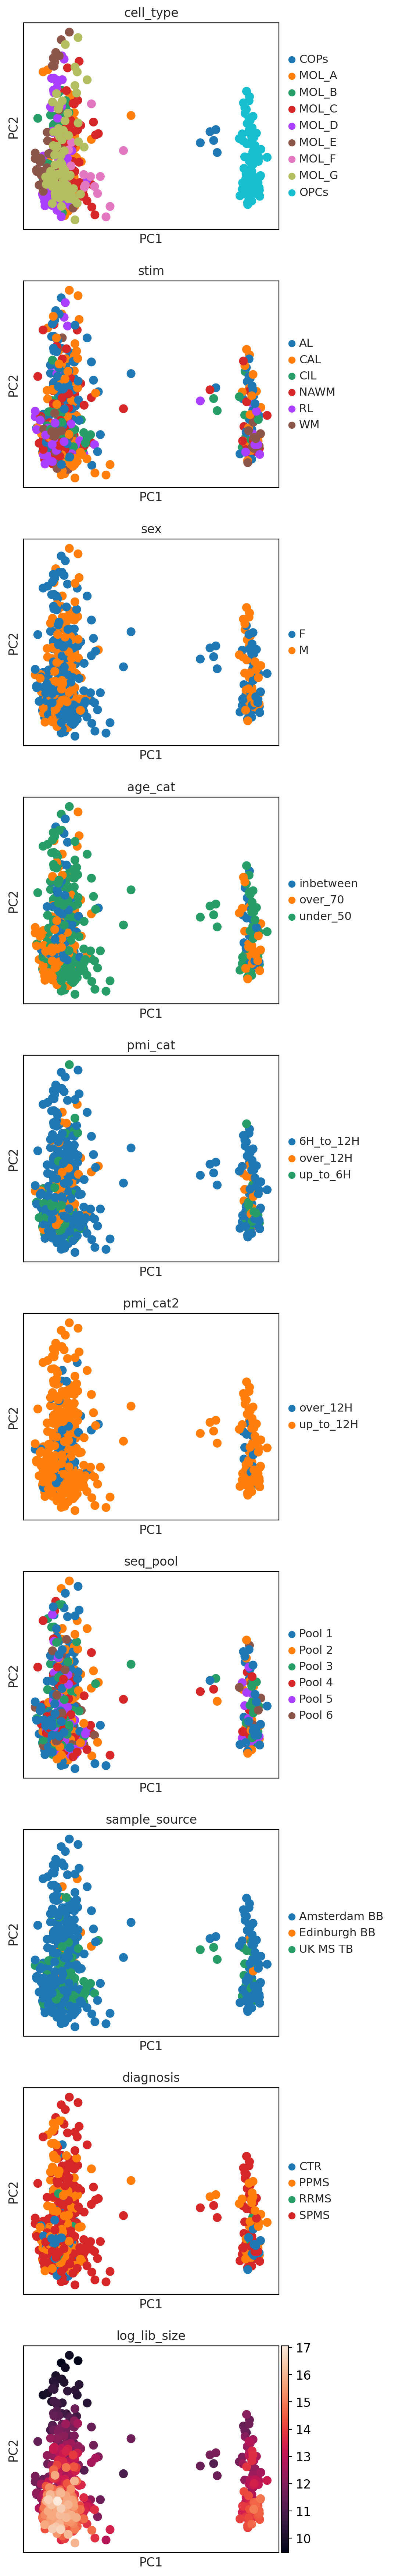

In [82]:
sc.pl.pca(adata_pb, color=["cell_type", "stim", "sex", "age_cat", 
                           "pmi_cat", "pmi_cat2", "seq_pool", "sample_source", "diagnosis", "log_lib_size"], ncols=1, size=300)

In [83]:
adata_pb.X = adata_pb.layers['counts'].copy()
adata_pb

AnnData object with n_obs × n_vars = 576 × 27766
    obs: 'sample', 'sample_lesion', 'diagnosis', 'sample_source', 'cell_type', 'sample_rep', 'replicate_cat', 'stim', 'sex', 'seq_pool', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'batch', 'lib_size', 'log_lib_size'
    uns: 'log1p', 'pca', 'cell_type_colors', 'stim_colors', 'sex_colors', 'age_cat_colors', 'pmi_cat_colors', 'pmi_cat2_colors', 'seq_pool_colors', 'sample_source_colors', 'diagnosis_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [84]:
adata_pb.write_h5ad('./pb_adata_MOL_sep.h5ad')